Nodal Analysis at Bottom-Hole Node
Nodal analysis, based on pressure continuity, solves for the flow rate at the bottom-hole. The inflow is modeled by the well inflow performance relationship (IPR), while the outflow is described by the tubing performance relationship (TPR). An interactive plot will demonstrate the effect of tubing diameter on flow rate.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data of Oil well
Pres = 3500 # psia (above Bubble Point)
D = 1.30 # (Default tubing ID) 
Pwellhead = 500 # psia
J = 1 # (above bubble Point)
GLR = 1000 # scf/stb
WC = 0.25 # (watercut)
oil_API = 30 # degree
Yw = 1.05
Yg = 0.65
Bo = 1.2 # rb/stb
Twellhead = 100 # degree F
Tubing_shoe_depth = 5000 # ft
Tbottomhole = 150 # degree F

In [32]:
# Oil specific gravity
Yo = 141.5 / (131.5 + oil_API)

# Gas-Oil ratio and water-oil ratio
GOR = GLR / (1 - WC)
WOR = WC / (1 - WC)

# Mass associated with 1 stb of oil
M = (350.17 * (Yo + 0.33 * Yw)) + (GOR * Yg * 0.0765)

# Wellhead parameters
Rs_head = Yg * ((Pwellhead / 18) * (10 ** (0.0125 * oil_API) / 10 ** (0.00091 * Twellhead))) ** 1.2048
Bo_head = 0.9759 + 0.00012 * ((Rs_head * (Yg / Yo) ** 0.5) + 1.25 * Twellhead) ** 1.2
Vm_head = 5.615 * (Bo_head + WC * Bo) + (GOR - Rs_head) * (14.7 / Pwellhead) * ((Twellhead + 460) / 520) * 0.9318

Rho_head = M / Vm_head


In [34]:
# Function to perform IPR and TPR calculations
def ipr_tpr(D):
    Ql = 500  # Initial flow rate (stb/day)
    Aof = J * Pres  # Max flow rate (stb/day)

    ipr = []
    tpr = []
    Q = []

    while Ql < Aof:
        Qo = Ql - Ql * WC  # Oil flow rate

        # IPR model: Pwf calculation
        Pwf_ipr = Pres - Qo / J
        ipr.append(Pwf_ipr)

        # Bottom hole parameters
        Rs_bottom = Yg * ((Pwf_ipr / 18) * (10 ** (0.0125 * oil_API) / 10 ** (0.00091 * Tbottomhole))) ** 1.2048
        Bo_bottom = 0.9759 + 0.00012 * ((Rs_bottom * (Yg / Yo) ** 0.5) + 1.25 * Tbottomhole) ** 1.2
        Vm_bottom = 5.615 * (Bo_bottom + WC * Bo) + (GOR - Rs_bottom) * (14.7 / Pwf_ipr) * ((Tbottomhole + 460) / 520) * 0.9318
        Rho_bottom = M / Vm_bottom

        Rho_mixture = (Rho_head + Rho_bottom) / 2

        # Friction factor
        rdv = 1.4737 * 10 ** -5 * M * Qo * 12 / D
        f = 4 * (10 ** (1.444 - 2.5 * np.log10(rdv)))

        # Friction term
        K = f * Qo ** 2 * M ** 2 / (7.4137 * 10 ** 10 * (D / 12) ** 5)

        # TPR model: Pwf calculation
        Pwf_tpr = Pwellhead + (Rho_mixture + K / Rho_mixture) * (Tubing_shoe_depth / 144)
        tpr.append(Pwf_tpr)

        # Find operational point (when error is minimal)
        error = abs(Pwf_ipr - Pwf_tpr)
        if error < 4:
            print(f"Operational Bottom Hole Pressure: {Pwf_ipr:.2f} psia")
            print(f"Operational Flow Rate: {Qo:.2f} stb/day")

        Q.append(Qo)
        Ql += 10

    return ipr, tpr, Q

Operational Bottom Hole Pressure: 1640.00 psia
Operational Flow Rate: 1860.00 stb/day


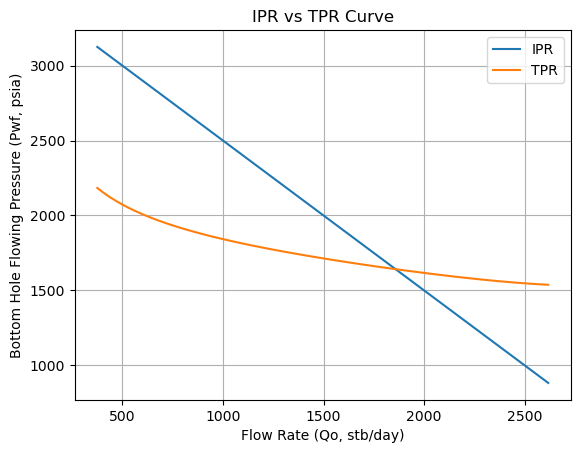

In [36]:
# Function to plot IPR and TPR curves
def plot_ipr_tpr(D):
    ipr, tpr, Q = ipr_tpr(D)

    # Plotting IPR and TPR curves
    plt.style.use('default')
    plt.plot(Q, ipr, label='IPR')
    plt.plot(Q, tpr, label='TPR')
    plt.title('IPR vs TPR Curve')
    plt.xlabel('Flow Rate (Qo, stb/day)')
    plt.ylabel("Bottom Hole Flowing Pressure (Pwf, psia)")
    plt.legend()
    plt.grid()
    plt.show()

# Call the plot function with a specific tubing diameter (change diameter as needed)
plot_ipr_tpr(1.66)
